## Aula 1 - Conhecendo a biblioteca e nossos dados

### Faça como eu fiz
Chegou a hora de você testar os conhecimentos desenvolvidos durante a aula. Para isso, vamos utilizar outro dataset em um desafio que será desenvolvido no decorrer do curso. Esse dataset é uma versão modificada do arquivo Oranges vs. Grapefruit presente no site do Kaggle. Portanto, utilizaremos o arquivo raw disponível no GitHub.

Nessa etapa, você deve efetuar a leitura dos dados. Para isso, importe a NumPy e use a `função loadtxt`. Use o link da url e o parâmetro `usecols` para pular a primeira coluna. É possível usar `np.arange` para criar a sequência de números que representam as colunas. Por fim, também é necessário incluir o parâmetro `skiprows=1` para que a primeira linha de texto seja desconsiderada na leitura do arquivo.

In [70]:
import numpy as np
url = 'https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv'
dado = np.loadtxt(url, delimiter=',',usecols=np.arange(1,6,1),skiprows=1)

## Aula 2 - Exploracao dos dados

### Faça como eu fiz
Chegou a hora de você testar os conhecimentos desenvolvidos durante a aula. Continuando com o projeto das laranjas/toranjas agora você deve selecionar parte dos dados. As colunas que iremos avaliar são as de diâmetro e peso. Crie arrays específicos para guardar o diâmetro e peso da laranja e toranja. O diâmetro está na coluna zero e o peso na coluna 1. Os dados referentes a laranja vão até a linha 4999 e os referentes à toranja iniciam na linha 5000 do arquivo.

Após fazer a seleção de dados, importe a biblioteca matplotlib e crie um gráfico para a laranja e para a toranja do peso pelo diâmetro.

In [71]:
# peso
peso_laranja = dado[:5000,1]
peso_toranja = dado[5000:,1]
# diametro
diametro_laranja = dado[:5000,0]
diametro_toranja = dado[5000:,0]

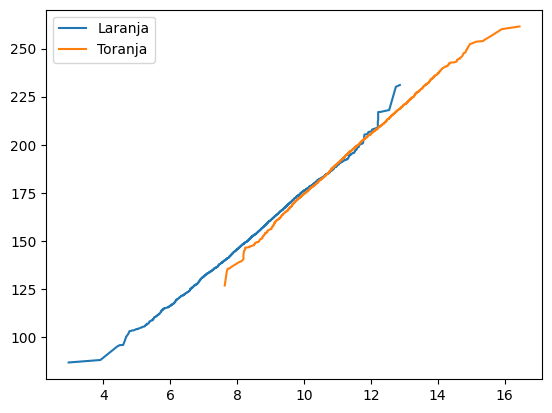

In [72]:
import matplotlib.pyplot as plt

plt.plot(diametro_laranja, peso_laranja)
plt.plot(diametro_toranja, peso_toranja)
plt.legend(['Laranja', 'Toranja'])


# O coeficiente das retas

As duas parecem ter uma inclinação muito parecida em uma primeira inspeção visual vamos determinar os coeficientes da reta para cada um dos casos. 

Lembre que para o coeficiente angular precisamos implementar a função:
$$ \hat{a} = \frac{n*Soma( X_i*Y_i ) - Soma( X_i )*Soma(Y_i)}{n Soma(X_i^2) - (Soma(X_i))^2}$$ 

e para o coeficiente linear:
$$ \hat{b} = Media(Y_i) - \hat{a} * Media(X_i) $$

Perceba que nesse caso o X é o diâmtro e o Y é o peso. Além disso o n é o número de elementos dentro do X, por exemplo.Ele vai ser diferente para a laranja e toranja. Determine o coefiecente para cada caso:

In [73]:
Y = peso_laranja
X = diametro_laranja
n = np.size(X)

a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2)-np.sum(X)**2)
b = np.mean(Y) - a*np.mean(X)

In [74]:
print(a)
print(b)


14.7997452319846
27.38560381218413


In [75]:
y = a*X + b

In [76]:
Y = peso_toranja
X = diametro_toranja
n = np.size(X)

In [77]:
a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2)-np.sum(X)**2)
a

15.70884459360376

In [78]:
b = np.mean(Y) - a*np.mean(X)
b

17.007102876817726

In [79]:
print(a)
print(b)

15.70884459360376
17.007102876817726


Se deu tudo você deve ter chegado em valores diferentes para cada um dos casos. Então, embora a inclinação da reta seja parecida nós descobrimos que os coeficientes da reta servem como uma forma de diferenciar se as frutas são laranjas ou toranjas.

# Estimando através de números aleatórios

Agora ao invés de usar a fórmula fechada utilize a np.random.uniform para gerar valores aleatórios para determinar o coeficiente angular da toranja. Nesse caso vamos assumir que b é igual a 17. Utilize o random.seed(84). 

In [80]:
b =17

In [81]:
norma = np.array([])
np.random.seed(84)
coef_angulares = np.random.uniform(low=0.0,high=30.0,size=100)

for i in range(100):
  norma = np.append(norma,np.linalg.norm(Y- (coef_angulares[i]*X+b)))

In [82]:
norma

array([11693.67355856,  3756.21335179,  6888.14382259,  2567.04685515,
       11420.77932891,  9623.66917996,  8570.85655292,  6496.51679273,
        2577.28271294,  9613.12064833,  5709.72883857,   695.35964734,
       10855.07029288,  5539.82389583,  3137.98293399,   296.30778902,
        8896.93668493,  8347.82090288, 10206.95670568, 10229.7542583 ,
        2193.54863897,  8448.39951623, 11004.80458021, 11563.3388543 ,
        4098.18752189,  7732.70842098,  2801.84736004,  7688.60780777,
       11134.73586307,  9432.12778879,   725.4664674 ,  6290.36141277,
        5189.67184491,  4716.99608173,  9250.47142251,  7274.49676931,
        8876.20611799,   621.16747277,  4716.1854569 ,  8050.51001798,
        9238.31227388,  3992.98429323, 11531.1764187 ,  5849.11139809,
        1042.57303406,  9875.3710071 , 11759.24152592,  8956.15615033,
        2219.50808351,  3585.49846047, 11347.59016791,  2477.87811921,
         878.91891293,  2740.88025627,  1766.171738  ,   710.47076735,
      

Se deu tudo certo a menor norma que você alcançou foi 104.40529157196431.

In [83]:
np.min(norma)

104.4052915719643

Algo que não foi passado no curso é que também podemos utilizar condições dentro dos colchetes dos arrays para encontrar um determinado valor. O código abaixo mostra o coeficiente angular que corresponde ao menor valor da norma. Repare que a condição é a: norma == np.min(norma).

In [84]:
coef_angulares[norma == np.min(norma)]

array([15.82512199])